<a href="https://colab.research.google.com/github/YashChaudhary16/PyTorch/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np

1. Data (prepare and load)
2. Build Model
3. Fitting the model to the data (training)
4. Making predictions and evaluating the model (inference)
5. Saving and loading a model
6. Putting it all together

In [3]:
from torch import nn # nn contains all of PyTorch's building block for Neural Networks
import matplotlib.pyplot as plt

# 1. Data: Preparing & Loading

## Create data

In [9]:
# Create known parameters
weight = 0.8
bias = 0.16

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(X.shape, y.shape)
X[:10], y[:10]

torch.Size([50, 1]) torch.Size([50, 1])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1600],
         [0.1760],
         [0.1920],
         [0.2080],
         [0.2240],
         [0.2400],
         [0.2560],
         [0.2720],
         [0.2880],
         [0.3040]]))

## Create train and test data

In [12]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualize data

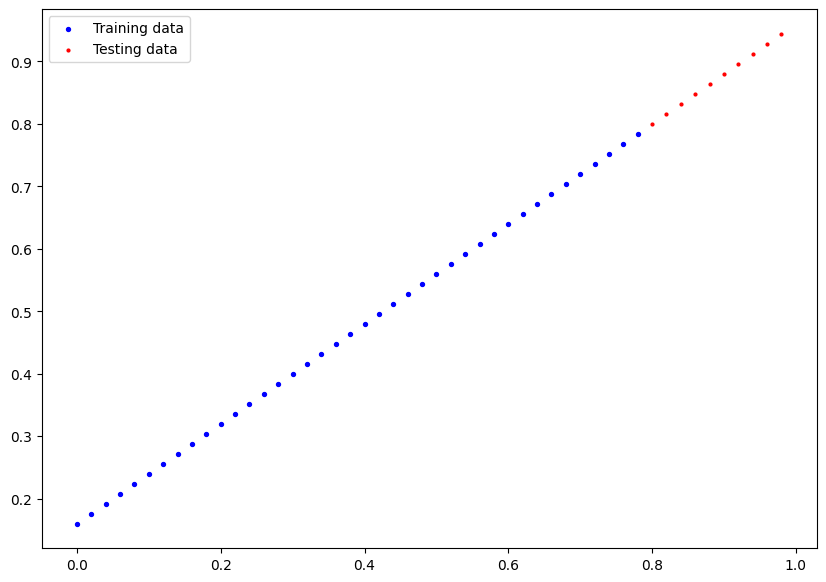

In [16]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels,c='b',s=8,label='Training data')
  plt.scatter(test_data,test_labels,c='r',s=4,label='Testing data')

  if predictions is not None:
    plt.scatter(test_data,predictions,c='g',s=10,label='Predictions')
  plt.legend()
  plt.show()

plot_predictions()

## First PyTorch Model

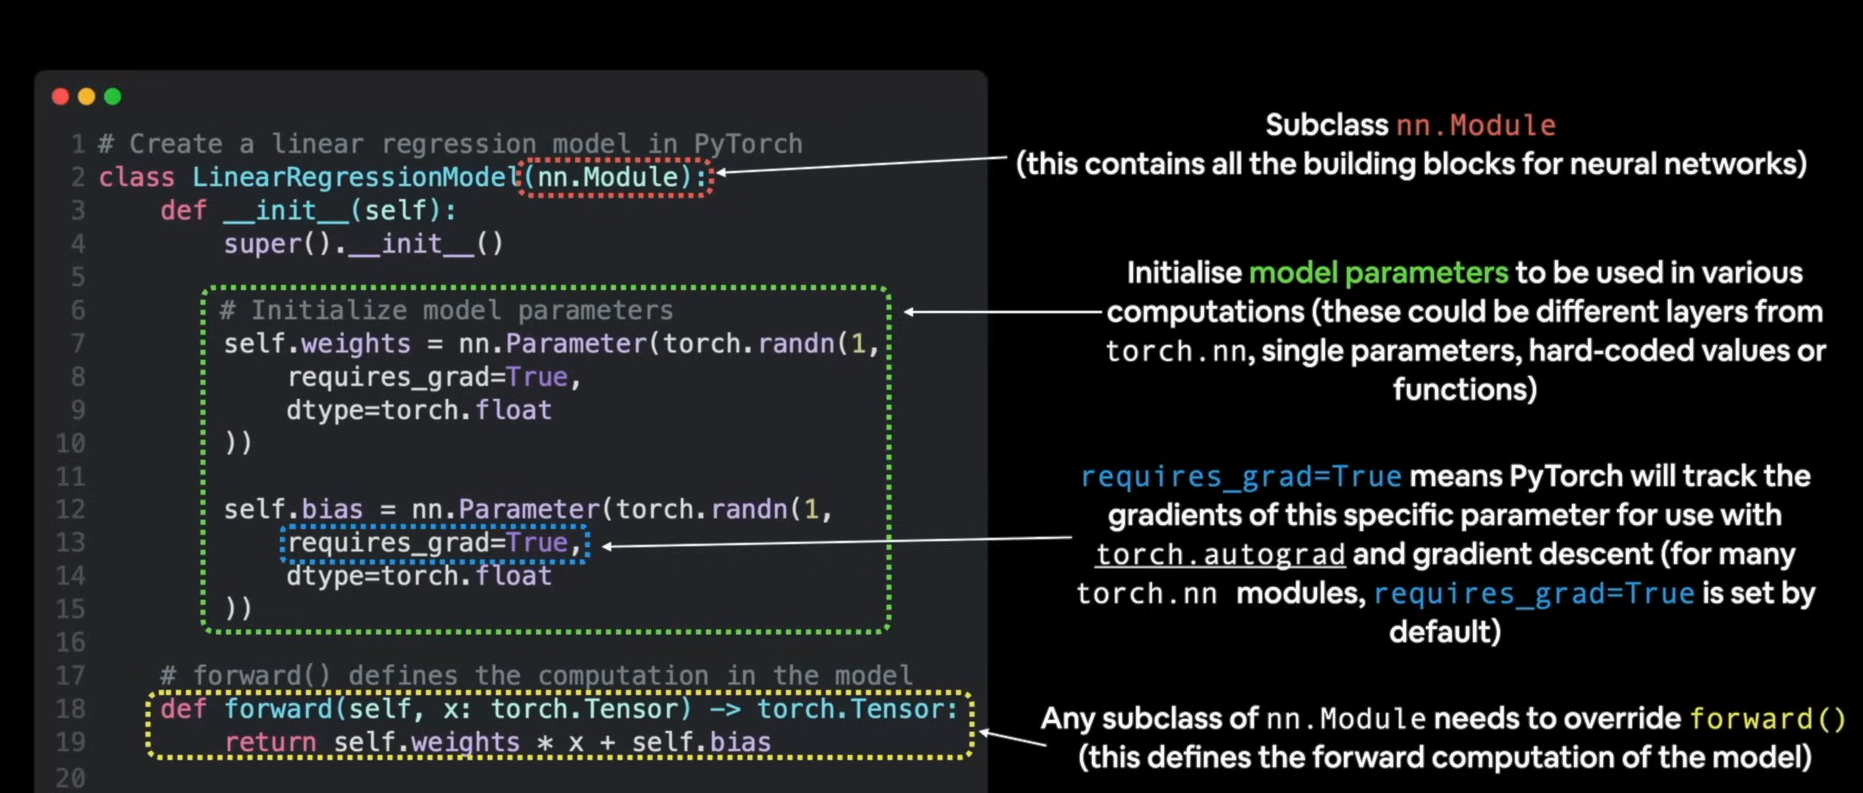

In [18]:
class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits from nn.Module, it is lego buiding bricks of PyTorch
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with random values and try to adjust it to the ideal weight
                                            requires_grad=True, # To keep track of gradients
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.sandn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    # Forward method to define computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor: # x is the input data
      return self.weights * x + self.bias # linear regression formula

    def

